## Spam SMS Detection

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# IMPORTING DATA

In [2]:
data = pd.read_csv(r"D:\vishal\Imarticus\CodSoft\SPAM SMS DETECTION\spam.csv" , encoding ='ISO-8859-1', usecols=[0, 1])
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.rename(columns={"v1":"category","v2":"message"},inplace=True)
data

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data_Target=data.copy()
data_Target

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
data.isnull().sum()

category    0
message     0
dtype: int64

In [6]:
data.shape

(5572, 2)

In [7]:
data.category.value_counts()

ham     4825
spam     747
Name: category, dtype: int64

<Axes: xlabel='category', ylabel='count'>

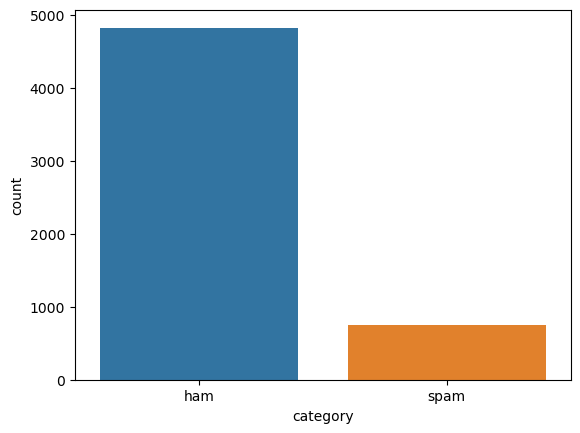

In [8]:
sns.countplot(x="category", data = data)

In [9]:
duplicate = data.duplicated().sum()
duplicate

403

In [10]:
data = data.drop_duplicates()
data.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data=pd.DataFrame(data.message)
data

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [12]:
data.iloc[2,0]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

# Data Cleaning or Pre-Processing

# Lower case

In [13]:
data.message= data.message.str.lower()

In [14]:
data.iloc[2,0]

"free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's"

# Punctuation

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuation(message):
    message_nopunt="".join([c for c in message if c not in string.punctuation])
    return message_nopunt

In [17]:
data['message'] = data['message'].apply(lambda x : remove_punctuation(x))

In [18]:
data.iloc[2,0]

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s'

# Remove url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [19]:
data['message'] = data['message'].str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[2,0]

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s'

# Remove Number

In [20]:
data.iloc[2,0]

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s'

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [21]:
data['message'] = data['message'].str.replace('\d+','')

In [22]:
data.iloc[2,0]

'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs'

# Removing Stop Words

In [23]:
# Import stopwords with nltk.
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
data.iloc[2,0]

'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs'

In [25]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['message'] = data['message'].apply(lambda x: ' '.join([word for word in x.split() #
                                                      if word not in (stop)]))

In [26]:
data.iloc[2,0]

'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs'

# Common Words

In [27]:
data.iloc[2,0]

'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs'

In [28]:
import re # replace of words
words = set(nltk.corpus.words.words())
words

{'pseudogyny',
 'armlet',
 'subdistrict',
 'sterile',
 'autoagglutination',
 'transversum',
 'abnormalism',
 'reconstructive',
 'iodoxy',
 'nonnephritic',
 'preflight',
 'leafit',
 'zoiatria',
 'pharmaceutist',
 'rivell',
 'supercommentary',
 'peridiolum',
 'tipiti',
 'bogus',
 'regma',
 'vermigrade',
 'shoddyite',
 'agyrate',
 'lavanga',
 'arhar',
 'irid',
 'pharmacognosist',
 'esodic',
 'Dermestes',
 'Germanomaniac',
 'hybrid',
 'epeirogenetic',
 'micropegmatite',
 'tegumen',
 'pendulum',
 'neophilological',
 'neurocirculatory',
 'counterglow',
 'Teleostomi',
 'watertightness',
 'cytostomal',
 'acraniate',
 'minter',
 'pistilloid',
 'trillion',
 'aspirate',
 'cinchophen',
 'gradational',
 'psychodrama',
 'undreaded',
 'apogenous',
 'underdrainage',
 'contractive',
 'inexhaustible',
 'allochetite',
 'ruga',
 'Bivalvia',
 'Micropterygidae',
 'nonalignment',
 'pneumonolith',
 'subulicorn',
 'lipoidic',
 'impedimentary',
 'ware',
 'atomology',
 'zantiote',
 'gaffsman',
 'wounding',
 'nor

In [29]:
# Apply a second round of cleaning
def clean_text_round2(message):
    
    message =  re.sub(r"\b[a-zA-Z]\b", "", message) ## 1 alphabet like a or s
    message =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", message)  ## 2 alphabet like ab or ad & aA
    message =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(message)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return message

In [30]:
# Let's take a look at the updated text
data['message']=data['message'].apply(lambda x : clean_text_round2(x))
data = pd.DataFrame(data.message.apply(lambda x: clean_text_round2(x)))

# Lemmatization

In [31]:
from nltk.stem import WordNetLemmatizer 
import nltk
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [32]:
def lemmatize_message(message):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(message)]

In [33]:
data.iloc[2,0]

'free entry win cup final may text receive entry apply'

In [34]:
data['message'] = data.message.apply(lambda x :' '.join(lemmatize_message(x)))
data.iloc[2,0]

'free entry win cup final may text receive entry apply'

# Strip extra whitespace

In [35]:
data['message'] = (data['message'].astype("str").str.rstrip())
data.iloc[2,0]

'free entry win cup final may text receive entry apply'

* Finished Data Cleaning

# Term Document Matrix

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=5000)
data_cv = cv.fit_transform(data.message)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,5159,5160,5161,5162,5163,5164,5165,5166,5167,5168
abbey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdomen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abnormally,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zac,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zebra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,5160,5161,5162,5163,5164,5165,5166,5167,5168,freq
abbey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abdomen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
abnormally,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,5160,5161,5162,5163,5164,5165,5166,5167,5168,freq
0,abbey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,abdomen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
4,abnormally,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
tdm1 = tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head(20)

,Word,freq
522,come,301
797,dont,258
1427,know,253
1048,free,245
2313,send,237
1482,like,231
2720,time,229
1125,good,217
1301,ill,206
2704,think,196


In [40]:
data.head()

,message
0,point crazy available great world buffet cine ...
1,lar
2,free entry win cup final may text receive entr...
3,dun say early already say
4,dont think go around though


In [41]:
data_Target

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [42]:
data['category']=data_Target.category
data.head()

,message,category
0,point crazy available great world buffet cine ...,ham
1,lar,ham
2,free entry win cup final may text receive entr...,spam
3,dun say early already say,ham
4,dont think go around though,ham


# Train

In [43]:
data_dtm['category']=data_Target.category
data_dtm.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,youd,young,younger,youve,yummy,zac,zebra,zed,zoom,category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


In [44]:
data=data_dtm
data

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,youd,young,younger,youve,yummy,zac,zebra,zed,zoom,category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
5165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


# Label encoding on Train

In [45]:
from sklearn.preprocessing import LabelEncoder

data = data.apply(LabelEncoder().fit_transform)
data.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,youd,young,younger,youve,yummy,zac,zebra,zed,zoom,category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Partition

In [46]:
from sklearn.model_selection import train_test_split

X = data.drop('category', axis = 1)
Y = data[['category']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=56)

# Model Building 

## 1) Logistic Reression Classifier

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg=LogisticRegression().fit(X_train, y_train)

## Prediction on Train Data

In [48]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,youd,young,younger,youve,yummy,zac,zebra,zed,zoom,category
2691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
train['Predicted'] = logreg.predict(X_train)
train.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,young,younger,youve,yummy,zac,zebra,zed,zoom,category,Predicted
2691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
from sklearn.metrics import classification_report
print(classification_report(train['Predicted'],train['category']))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      3550
           1       0.14      0.99      0.24        68

    accuracy                           0.88      3618
   macro avg       0.57      0.93      0.59      3618
weighted avg       0.98      0.88      0.92      3618



## Prediction on Test Data

In [51]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,youd,young,younger,youve,yummy,zac,zebra,zed,zoom,category
2961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
test['Predicted'] = logreg.predict(X_test)
test.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,young,younger,youve,yummy,zac,zebra,zed,zoom,category,Predicted
2961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
from sklearn.metrics import classification_report
print(classification_report(test['Predicted'],test['category']))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1537
           1       0.01      0.14      0.02        14

    accuracy                           0.86      1551
   macro avg       0.50      0.51      0.47      1551
weighted avg       0.98      0.86      0.92      1551



# 2) Naive Baye's

In [54]:
# Gaussian Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
model= BernoulliNB(alpha=0)  
model.fit(X_train, y_train)

BernoulliNB(alpha=0)

## Prediction on Train Data

In [55]:
Ntrain=pd.concat([X_train,y_train],axis=1)
Ntrain.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,youd,young,younger,youve,yummy,zac,zebra,zed,zoom,category
2691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
Ntrain['Probability']=model.predict_proba(X_train)[:,1]
Ntrain['Predicted']=np.where(Ntrain['Probability'] >= 0.7,1,0)  #thershold  >0.7
Ntrain.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,younger,youve,yummy,zac,zebra,zed,zoom,category,Probability,Predicted
2691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.241750e-02,0
3604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.254987e-01,0
3437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.624639e-11,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.008015e-01,1
4067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2.104814e-01,0


In [57]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(Ntrain['Predicted'],Ntrain['category'])
print(matrix)

[[3087  292]
 [  38  201]]


In [58]:
accuracy = ((3087)/(3087+292))*100
accuracy

91.35839005622965

In [59]:
print(classification_report(Ntrain['category'], Ntrain['Predicted']))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3125
           1       0.84      0.41      0.55       493

    accuracy                           0.91      3618
   macro avg       0.88      0.70      0.75      3618
weighted avg       0.90      0.91      0.89      3618



## Prediction on Test Data

In [60]:
Ntest=pd.concat([X_test,y_test],axis=1)
Ntest.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,youd,young,younger,youve,yummy,zac,zebra,zed,zoom,category
2961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
Ntest['Probability']=model.predict_proba(X_test)[:,1]
Ntest['Predicted']=np.where(Ntest['Probability'] >= 0.7,1,0)  #thershold  >0.7
Ntest.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,younger,youve,yummy,zac,zebra,zed,zoom,category,Probability,Predicted
2961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.742322e-11,0
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.000000e+00,1
4977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.071319e-01,0
3173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.312315e-10,0
2295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.660629e-10,0


In [62]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(Ntest['Predicted'],Ntest['category'])
print(matrix)

[[1241  185]
 [ 104   21]]


In [63]:
accuracy = ((1241+21)/(1241+185+104+21))*100
accuracy

81.36686009026435

In [64]:
print(classification_report(Ntest['category'], Ntest['Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1345
           1       0.17      0.10      0.13       206

    accuracy                           0.81      1551
   macro avg       0.52      0.51      0.51      1551
weighted avg       0.78      0.81      0.79      1551



# 3) Support Vector Machine

In [65]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear',probability=True)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

## Prediction on Train Data

In [66]:
Vtrain=pd.concat([X_train,y_train],axis=1)
Vtrain.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,youd,young,younger,youve,yummy,zac,zebra,zed,zoom,category
2691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
Vtrain['Probability']=svm_classifier.predict_proba(X_train)[:,1]
Vtrain['Predicted']=np.where(Vtrain['Probability'] >= 0.7,1,0)  #thershold  >0.7
Vtrain.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,younger,youve,yummy,zac,zebra,zed,zoom,category,Probability,Predicted
2691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.137651,0
3604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.135341,0
3437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.141656,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.122538,0
4067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.134838,0


In [68]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(Vtrain['Predicted'],Vtrain['category'])
print(matrix)

[[3125  493]
 [   0    0]]


In [69]:
accuracy = ((3125)/(3125+493))*100
accuracy

86.37368711995578

In [70]:
print(classification_report(Vtrain['category'], Vtrain['Predicted']))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      3125
           1       0.00      0.00      0.00       493

    accuracy                           0.86      3618
   macro avg       0.43      0.50      0.46      3618
weighted avg       0.75      0.86      0.80      3618



## Prediction on Test Data

In [71]:
Vtest=pd.concat([X_test,y_test],axis=1)
Vtest.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,youd,young,younger,youve,yummy,zac,zebra,zed,zoom,category
2961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
Vtest['Probability']=svm_classifier.predict_proba(X_test)[:,1]
Vtest['Predicted']=np.where(Vtest['Probability'] >= 0.7,1,0)  #thershold  >0.7
Vtest.head()

,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,abuse,...,younger,youve,yummy,zac,zebra,zed,zoom,category,Probability,Predicted
2961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.135674,0
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.120065,0
4977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.136046,0
3173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.134159,0
2295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.124301,0


In [73]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(Vtest['Predicted'],Vtest['category'])
print(matrix)

[[1345  206]
 [   0    0]]


In [74]:
accuracy = ((1345)/(1345+206))*100
accuracy

86.71824629271437

In [75]:
print(classification_report(Vtest['category'], Vtest['Predicted']))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1345
           1       0.00      0.00      0.00       206

    accuracy                           0.87      1551
   macro avg       0.43      0.50      0.46      1551
weighted avg       0.75      0.87      0.81      1551



# Comparision of Accuracy of Algorithms

Accuracy of Models

    * Logistic Regression = Train:88%, Test:86%
    
    * Navie Bayes = Train:91%, Test:81%
    
    * Support Vector Machine = Train:86%, Test:87%

# End